# INSTALLATIONS

In [1]:
pip install deepface


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ultralytics


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install kaggle


In [1]:
import os

In [6]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# used to supress display of warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
import pandas as pd
import re

In [7]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

metrics = ["cosine", "euclidean", "euclidean_l2"]
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
]
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'fastmtcnn',
]

# DETECT THE FACES

In [8]:
img1_path=r"C:\Users\envy\Downloads\ajoliebpitt.jpg" #image to detect faces in

In [9]:
def findFaces(img1_path,backend):
    faces=DeepFace.extract_faces(img1_path,detector_backend = backends[backend])
    n=len(faces)

    print(n)
    for i in range(0,n):
        plt.imshow(faces[i]['face'])
        plt.show()

2


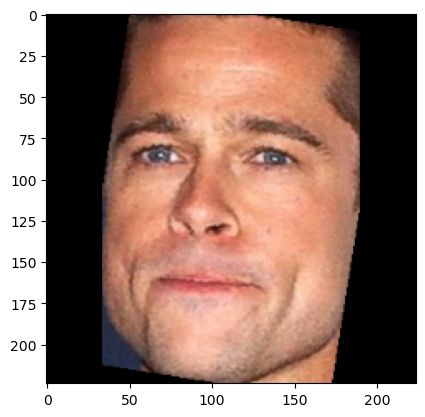

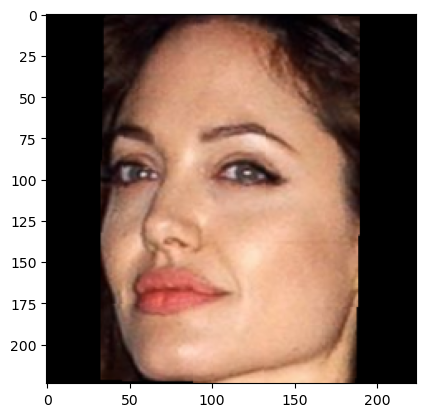

2


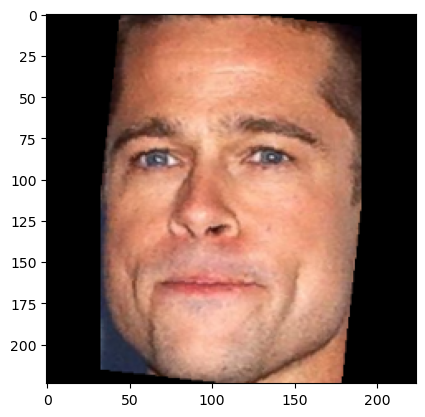

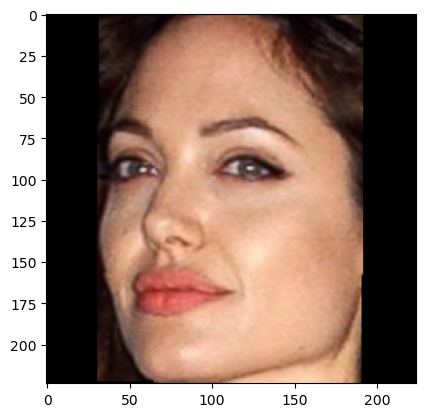

In [10]:
# we find how many faces are there
findFaces(img1_path,4)
findFaces(img1_path,6)

In [11]:
#get img path for a sub image of an image
faces=DeepFace.extract_faces(img_path=img1_path,detector_backend = backends[4])
original_image = Image.open(img1_path)
for i, face in enumerate(faces):
    x, y, w, h = face['facial_area']['x'], face['facial_area']['y'], face['facial_area']['w'], face['facial_area']['h']
    # Convert coordinates to integers
    x, y, w, h = map(int, [x, y, w, h])
    # Crop the face region from the original image
    face_image = original_image.crop((x, y, x + w, y + h))
    # Save the face image (you may want to save it to a specific directory)
    face_image.save(f"face_{i+1}.jpg")


# FINDING FACES IN  A FOLDER

In [13]:
def verify(img1_path,img2_path):
    img1=cv2.imread(img1_path)
    img2=cv2.imread(img2_path)
    
    #print(img1,img2)
    
    plt.imshow(img1[:,:,::-1])
    plt.show()
    plt.imshow(img2[:,:,::-1])
    plt.show()
    
    result=DeepFace.verify(img1_path,img2_path,model_name = models[2],distance_metric = metrics[1],detector_backend = backends[4],enforce_detection=False)
    print("Result:",result)
    verification=result['verified']
    
    return verification


In [14]:
# get the folder into readable db format

import zipfile


zip_path = r"C:\Users\envy\Downloads\archive.zip"
extracted_path = r"C:\Users\envy\Downloads\extracted"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Now you can access the contents of the extracted directory
database_directory = os.path.join(extracted_path, "Celebrity Faces Dataset")

# Check if the directory exists
if os.path.exists(database_directory):
    print(f"Database directory found: {database_directory}")
else:
    print(f"Database directory not found: {database_directory}")


Database directory found: C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset


In [15]:
database_directory 

'C:\\Users\\envy\\Downloads\\extracted\\Celebrity Faces Dataset'

In [16]:
#APPROACH 1- USE DEEPFACE.FIND(but it stores in a pickle file)

In [18]:
df=DeepFace.find(img_path="face_1.jpg",db_path=database_directory,model_name = models[2],distance_metric = metrics[1],detector_backend = backends[4],enforce_detection=False)

23-12-17 16:39:48 - ⚠️ Representations for images in C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset folder were previously stored in representations_facenet512.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
23-12-17 16:39:48 - There are 2029 representations found in representations_facenet512.pkl
23-12-17 16:40:06 - find function lasts 17.592671632766724 seconds


# RETURN WHICH FILE AND PAN/NAME IN DATASET MATCHES WHICH FACE DETECTED IN OUR IMAGE

In [ ]:
#APPROACH 2:USE VERIFY(so can break after one found,increasinf efficiency) AND PRINT OUT THE DEETS FROM IT

In [19]:
# Function to iterate through files in a directory and its subdirectories
def iterate_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            yield os.path.join(root, filename)
            
            

In [20]:
db_all=iterate_files(database_directory)

In [21]:
for i in db_all:
    print(i)

C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\representations_facenet512.pkl
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\001_fe3347c0.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\002_8f8da10e.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\003_57612506.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\004_f61e7d0c.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\005_582c121a.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\006_9135205d.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\007_cabbfcbb.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\008_d1f87068.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\009_fb3e6174.jpg
C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\010_f99d79e3.jpg
C:\Users\en

In [22]:
# Load the detected faces
detected_faces = [f"face_{i+1}.jpg" for i in range(len(faces))]

In [24]:

for face in detected_faces:
    file_to_verify=face
# Iterate through each file in the database directory and its subdirectories
    for img_path in iterate_files(database_directory):
        # debug print(img_path)
        try:
    # Verify the specific file against the current database image
            df = DeepFace.verify(face, img_path, model_name = models[2],distance_metric = metrics[1],detector_backend = backends[4],enforce_detection=False)

    # Check the result
            if df["verified"]:
                print(f"File verified: {file_to_verify} against {img_path}")
                try:
                #pattern=r"[A-Z]{3}[PCAFHT]{1}[A-Z]{1}[0-9]{3}[1-9]{1}[A-Z]{1}"
                    pattern="Angelina"
                    text=img_path
                    match=re.search(pattern,text)
                    print(match[0])
        # You can choose to break here if you only want to find the first match
                except:
                    pass
                break
            #else:
                #print(f"File not verified: {file_to_verify} against {img_path}")
        except Exception as e:
            print(f"Error processing {img_path}: {str(e)}")


Error processing C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\representations_facenet512.pkl: 'NoneType' object has no attribute 'shape'
File verified: face_1.jpg against C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Brad Pitt\001_c04300ef.jpg
Error processing C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\representations_facenet512.pkl: 'NoneType' object has no attribute 'shape'
File verified: face_2.jpg against C:\Users\envy\Downloads\extracted\Celebrity Faces Dataset\Angelina Jolie\001_fe3347c0.jpg
Angelina


In [ ]:
#Checking Embeddings

In [16]:
embedding_objs = DeepFace.represent(img_path=img1_path, 
      model_name = models[2],detector_backend = backends[4],enforce_detection=False)

In [17]:
embedding_objs 

[{'embedding': [0.6534074544906616,
   1.217343807220459,
   0.4204629361629486,
   -0.27294960618019104,
   -1.0101557970046997,
   -0.33719155192375183,
   0.22993695735931396,
   -0.010750309564173222,
   -0.20400777459144592,
   0.03483494371175766,
   -0.2346389889717102,
   0.7652191519737244,
   -0.8328713774681091,
   0.40668901801109314,
   0.8355618715286255,
   1.5289595127105713,
   0.8839309215545654,
   -1.5620328187942505,
   -0.5144374370574951,
   -0.07773247361183167,
   -0.8237118124961853,
   0.11597052216529846,
   -0.08712247759103775,
   1.805678129196167,
   0.7530699968338013,
   -0.9909483194351196,
   -1.6559280157089233,
   0.4000621438026428,
   -1.0746841430664062,
   0.9474313259124756,
   -1.553924322128296,
   -0.12965503334999084,
   -0.12614865601062775,
   -0.0012697931379079819,
   0.4862961769104004,
   -0.30749884247779846,
   1.0704684257507324,
   -0.6625494956970215,
   0.15457355976104736,
   -0.6233983039855957,
   0.896449863910675,
   1.594